In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
TB=0
TE=3355
INPUT_SIZE=9
OUTPUT_SIZE=1
BATCH_SIZE=1
TIME_STEPS=1
CELL_SIZE=10
HIDD=100

In [3]:
f=open('test_7.csv') 
df=pd.read_csv(f)     
data=df.iloc[:,2:12].values

In [4]:
def get_train_data(train_begin=TB,train_end=TE):
    global train_mean, train_std
    data_train=data[train_begin:train_end]
    train_mean=np.mean(data_train,axis=0)
    train_std=np.std(data_train,axis=0)
    normalized_train_data=(data_train-train_mean)/train_std
    train_x = normalized_train_data[:,:INPUT_SIZE]
    train_y = normalized_train_data[:,9,np.newaxis]
    return train_x[:, np.newaxis], train_y[:,:]
train_x, train_y=get_train_data()

In [5]:
def get_test_data(test_begin=TE):
    global test_mean, test_std
    data_test=data[test_begin:]
    test_mean=np.mean(data_test,axis=0)
    test_std=np.std(data_test,axis=0)
    test_data=(data_test-test_mean)/test_std
    test_x=test_data[:,:INPUT_SIZE]
    test_y=test_data[:,9,np.newaxis]
    return test_x[:, np.newaxis], test_y[:, np.newaxis]
test_x, test_y=get_test_data()

In [6]:
model = Sequential()

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=500))

model.add(Dropout(0.2))

model.add(Dense(1)) 
model.add(Activation('linear'))
#model.compile(optimizer='rmsprop', loss='mse') 
model.compile(optimizer='adam', loss='mse')

C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, batch_input_shape=(1, 1, 9), units=500)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, batch_input_shape=(1, 1, 9), units=500)`
  import sys
C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, batch_input_shape=(1, 1, 9), units=500)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=

In [7]:
train_history=model.fit(train_x, train_y, batch_size=BATCH_SIZE, epochs=5, verbose=2)
#.

Epoch 1/5
1976s - loss: 0.0735
Epoch 2/5
1962s - loss: 0.0441
Epoch 3/5
1958s - loss: 0.0357
Epoch 4/5
1960s - loss: 0.0495
Epoch 5/5
1961s - loss: 0.0358


In [8]:
trainScore = model.evaluate(train_x, train_y, batch_size=BATCH_SIZE, verbose=1)
print(trainScore)

3355/3355 [==============================] - 62s    
0.0134823626435


In [8]:
predict=model.predict(test_x, batch_size=BATCH_SIZE,verbose=1)
print(predict)

100/100 [==============================] - 2s     
[[-2.18518567]
 [-1.77455986]
 [-1.74187589]
 [-1.72143137]
 [-1.60234988]
 [-1.62547433]
 [-2.35714793]
 [-2.3347168 ]
 [-2.38915658]
 [-2.42519188]
 [-2.03169465]
 [-1.4843688 ]
 [-1.17024827]
 [-1.04294574]
 [-0.96047109]
 [-0.90987158]
 [-0.61976653]
 [-0.16163699]
 [-0.47486332]
 [-0.38915169]
 [-0.69369489]
 [-0.58312482]
 [-0.66210002]
 [-0.62086338]
 [-0.54050189]
 [-0.7514264 ]
 [-0.69229835]
 [-0.26661861]
 [-0.011187  ]
 [ 0.37813115]
 [ 0.34276679]
 [ 0.56715596]
 [ 0.50813782]
 [ 0.72437215]
 [ 0.83284503]
 [ 0.55719769]
 [ 0.45135292]
 [ 0.61421043]
 [ 0.61496645]
 [ 0.80819505]
 [ 0.47824559]
 [-0.02936076]
 [ 0.320905  ]
 [ 0.56663364]
 [ 0.36461389]
 [ 0.53399581]
 [ 0.835922  ]
 [ 0.93399161]
 [ 0.57236296]
 [ 0.33690372]
 [-0.1723119 ]
 [-0.14204979]
 [-0.12202765]
 [-0.28518298]
 [-0.02320788]
 [-0.26583245]
 [-0.25282365]
 [ 0.10732342]
 [ 0.26095918]
 [ 0.50830722]
 [ 0.75805068]
 [ 0.74882829]
 [ 0.53899413]
 [ 0

In [9]:
predict.reshape(-1)
test_predict=np.array(predict)*test_std[3]+test_mean[3]
test_y_=np.array(test_y)*test_std[9]+test_mean[9]

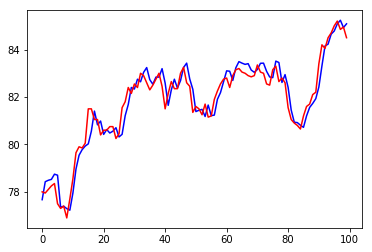

In [11]:
plt.figure()
plt.plot(list(range(len(test_predict))), test_predict, color='b')
plt.plot(list(range(len(test_y_))), test_y_.reshape(-1), color='r')
plt.show()

In [12]:
x=0
for i in range(50,len(test_predict),1):
    print(abs(test_predict[i]-test_y_[i]))
    x += abs(test_predict[i]-test_y_[i])
print("======================")
print(x/50)

[[ 0.21511993]]
[[ 0.05924988]]
[[ 0.22771454]]
[[ 0.52349396]]
[[ 0.51015625]]
[[ 0.01222687]]
[[ 0.6637558]]
[[ 0.34886169]]
[[ 0.36521606]]
[[ 0.10856628]]
[[ 0.30250092]]
[[ 0.68547974]]
[[ 0.20191803]]
[[ 0.08216248]]
[[ 0.29099731]]
[[ 0.37745972]]
[[ 0.37555695]]
[[ 0.50468597]]
[[ 0.28598633]]
[[ 0.14029846]]
[[ 0.1904007]]
[[ 0.3708374]]
[[ 0.42673492]]
[[ 0.53283234]]
[[ 0.34369659]]
[[ 0.33493652]]
[[ 0.21273346]]
[[ 0.80400238]]
[[ 0.18755035]]
[[ 0.34311523]]
[[ 0.8537323]]
[[ 0.40069122]]
[[ 0.03682098]]
[[ 0.11954041]]
[[ 0.16040192]]
[[ 0.47978516]]
[[ 0.39573059]]
[[ 0.14129944]]
[[ 0.3714386]]
[[ 0.2713501]]
[[ 0.97774353]]
[[ 0.88727112]]
[[ 0.10302277]]
[[ 0.271492]]
[[ 0.05003662]]
[[ 0.21705627]]
[[ 0.11420746]]
[[ 0.38617554]]
[[ 0.02080078]]
[[ 0.58483887]]
[[ 0.33743365]]


In [57]:
np.savetxt('Output_test_predict.csv', test_predict, delimiter=",")
np.savetxt('Output_test_Y.csv', test_y_, delimiter=",")

TypeError: dense() missing 1 required positional argument: 'units'